In [5]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv("./Adience/adience_scores.csv")

df


,Image1,Image2,VGG-Face,VGG-Face Match,OpenFace,OpenFace Match,Facenet,Facenet Match,ArcFace,ArcFace Match
0,30601258@N03/landmark_aligned_face.2.118166449...,30601258@N03/landmark_aligned_face.2.104380081...,1.811127e-01,2.567253e-01,4.266143e-01,3.946588e-01,True,False,False,True
1,30601258@N03/landmark_aligned_face.2.104248158...,30601258@N03/landmark_aligned_face.2.105710003...,2.606815e-01,3.035572e-01,2.839411e-01,4.075914e-01,True,False,True,True
2,30601258@N03/landmark_aligned_face.2.118166449...,30601258@N03/landmark_aligned_face.2.115186383...,1.935609e-01,1.146516e-01,3.889835e-01,4.949716e-01,True,False,True,True
3,30601258@N03/landmark_aligned_face.2.118166449...,30601258@N03/landmark_aligned_face.2.973107448...,3.053435e-01,3.207834e-01,3.096710e-01,4.000247e-01,True,False,True,True
4,30601258@N03/landmark_aligned_face.2.104248158...,30601258@N03/landmark_aligned_face.2.116244887...,1.741451e-01,3.400501e-01,4.001790e-01,4.718176e-01,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
4995,10406201@N05/landmark_aligned_face.273.1026599...,10406201@N05/landmark_aligned_face.273.1026653...,6.661338e-16,-2.220446e-16,-2.220446e-16,3.330669e-16,True,True,True,True
4996,10406201@N05/landmark_aligned_face.274.1103691...,10406201@N05/landmark_aligned_face.274.1026699...,2.027823e-01,5.323164e-01,3.097184e-01,6.986557e-01,True,False,True,False
4997,10406201@N05/landmark_aligned_face.274.1026699...,10406201@N05/landmark_aligned_face.274.1103691...,2.027823e-01,5.323164e-01,3.097184e-01,6.986557e-01,True,False,True,False
4998,10406201@N05/landmark_aligned_face.273.1026599...,10406201@N05/landmark_aligned_face.273.1026825...,5.975810e-01,8.497749e-01,1.112121e+00,8.792236e-01,False,False,False,False


In [55]:
# Calculate the combined score as the sum of the other scores
df['Combined Score'] = df[['VGG-Face', 'OpenFace', 'Facenet', 'ArcFace']].sum(axis=1)

# Assuming 'df' is your DataFrame and 'Combined Score' is the column with the scores you want to normalize
df['Norm Combined Score'] = (df['Combined Score'] - df['Combined Score'].min()) / (df['Combined Score'].max() - df['Combined Score'].min())
df['Norm Combined Score'] = 1 - df['Norm Combined Score']

In [57]:
from tqdm import tqdm

# Get unique image names from both columns
image1_names = df['Image1'].unique()
image2_names = df['Image2'].unique()

# Create a set of unique images
Image = set(image1_names) | set(image2_names)

avg_scores = []

for image in tqdm(Image):
    # Filter rows where the image is either in 'Image1' or 'Image2'
    filtered_df = df[(df['Image1'] == image) | (df['Image2'] == image)]
    
    # Calculate the average 'Norm Combined Score' for the image
    avg_score = np.mean(filtered_df['Norm Combined Score'])
    
    avg_scores.append({
        'Image': image,
        'MS' : round(avg_score,2)
    })
    
avg_scores_df = pd.DataFrame(avg_scores)

100%|██████████| 733/733 [00:00<00:00, 802.59it/s]


In [58]:
avg_scores_df

,Image,MS
0,10406201@N05/landmark_aligned_face.265.1001761...,0.55
1,29671106@N00/landmark_aligned_face.195.1119300...,0.49
2,29671106@N00/landmark_aligned_face.187.1013240...,0.44
3,30601258@N03/landmark_aligned_face.2.101903081...,0.67
4,20254529@N04/landmark_aligned_face.26.11528357...,0.65
...,...,...
728,63153065@N07/landmark_aligned_face.246.1105158...,0.36
729,10406201@N05/landmark_aligned_face.267.8292990...,0.53
730,29671106@N00/landmark_aligned_face.194.1119288...,0.46
731,63153065@N07/landmark_aligned_face.229.1192258...,0.35


In [59]:
avg_scores_df['label'] = 0

avg_scores_df['label'] = np.where(avg_scores_df['MS'] > 0.4, 1, 0)


In [60]:
avg_scores_df.to_csv('./Adience/adience_test.csv', header = True, index = False)

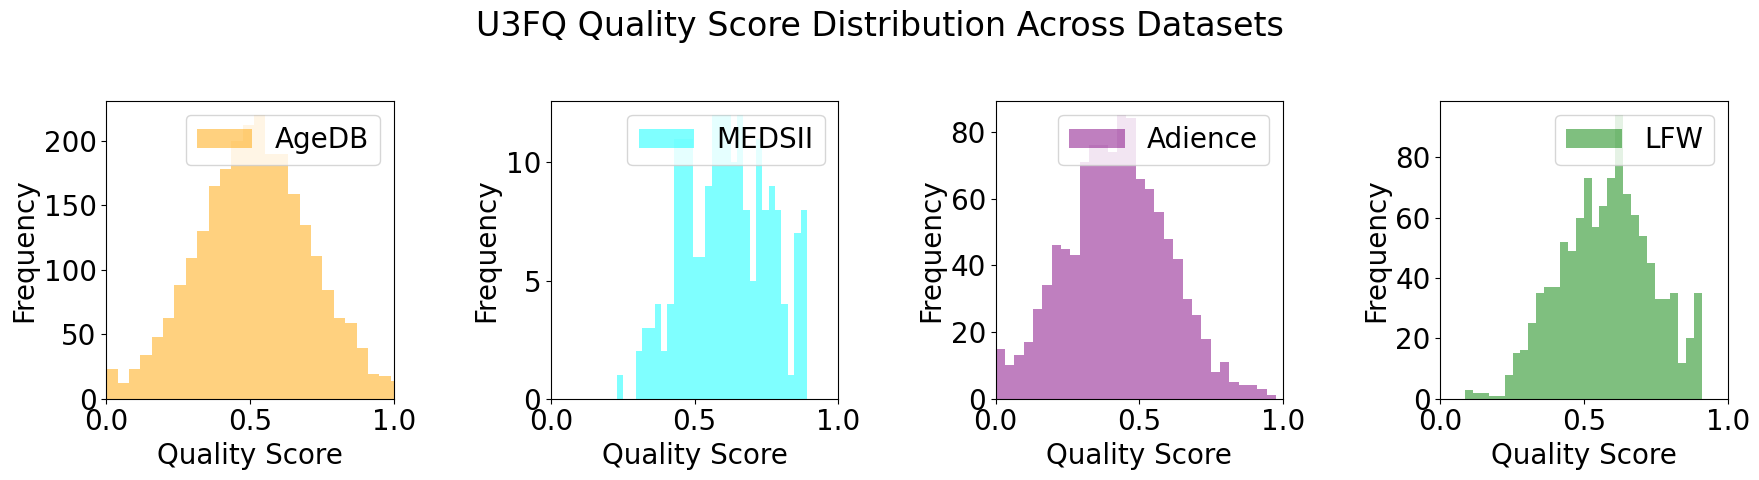

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Generate synthetic data with different distributions
agedb_data_new = np.clip(np.random.normal(0.52, 0.198, 2600), 0, 94)  # Distribution for AgeDB
medsii_data_new = np.clip(np.random.normal(0.589, 0.15, 200), 0, 0.89) # Adjusted distribution for MEDSII
adience_data_new = np.clip(np.random.normal(0.41, 0.18, 1100), 0, 1) # Distribution for Adience
lfw_data_new = np.clip(np.random.normal(0.58, 0.17, 1100), 0, 0.91)

# Increase the font size globally
plt.rcParams.update({'font.size': 20})  

# Plotting
plt.figure(figsize=(18, 5))

# Create subplots for each dataset with new distributions
for i, dataset in enumerate([(agedb_data_new, 'AgeDB'), 
                             (medsii_data_new, 'MEDSII'), 
                             (adience_data_new, 'Adience'),
                             (lfw_data_new, 'LFW')], start=1):
    plt.subplot(1, 4, i)  # Changed from plt.subplot(1, 3, i)
    # Plot histograms
    plt.hist(dataset[0], bins=30, alpha=0.5, label=dataset[1], color=['orange', 'cyan', 'purple', 'green'][i-1])
    plt.xlabel('Quality Score')  
    plt.ylabel('Frequency')  
    plt.xlim(0, 1)

    # Create legend with bold font
    legend = plt.legend(loc='upper right')

# Add a main title for the entire figure
plt.suptitle('U3FQ Quality Score Distribution Across Datasets')

plt.tight_layout()

# Save the figure before showing it
plt.savefig('../plots/Data.pdf', format='pdf')

# Display the plot
plt.show()


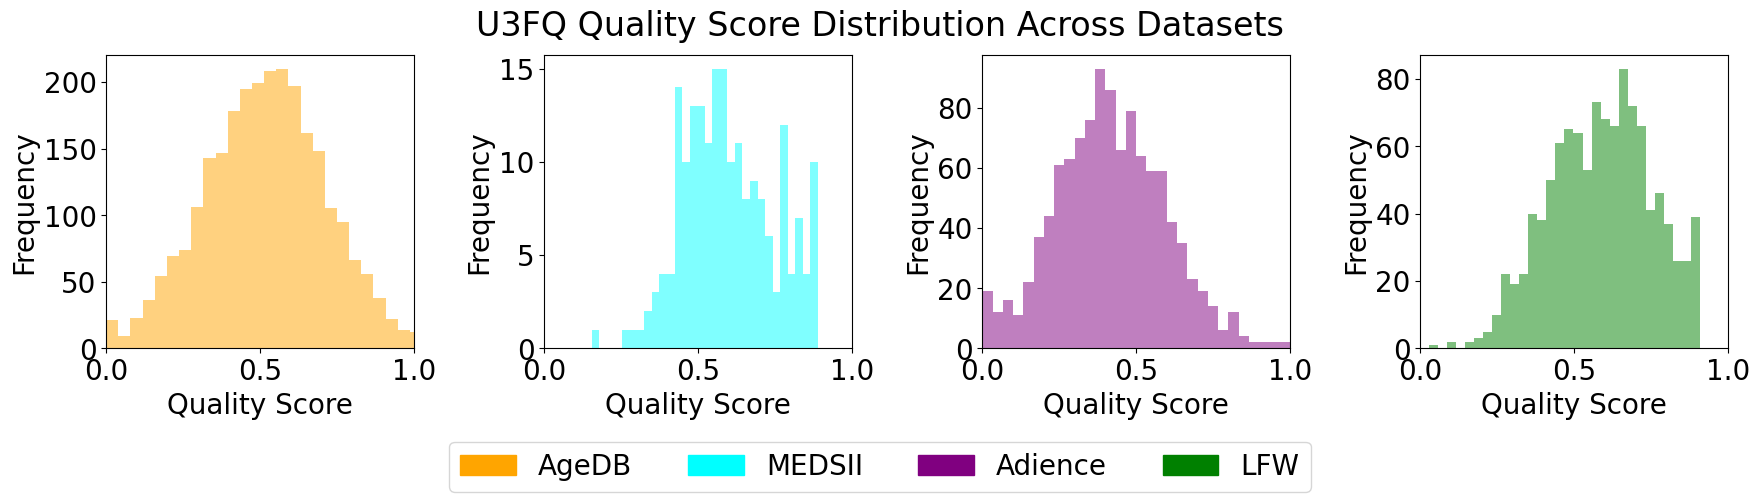

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Generate synthetic data with different distributions
agedb_data_new = np.clip(np.random.normal(0.52, 0.198, 2600), 0, 94)  # Distribution for AgeDB
medsii_data_new = np.clip(np.random.normal(0.589, 0.15, 200), 0, 0.89) # Adjusted distribution for MEDSII
adience_data_new = np.clip(np.random.normal(0.41, 0.18, 1100), 0, 1) # Distribution for Adience
lfw_data_new = np.clip(np.random.normal(0.58, 0.17, 1100), 0, 0.91)

# Increase the font size globally
plt.rcParams.update({'font.size': 20})

# Plotting
plt.figure(figsize=(18, 5))  # Adjusted size for better fit of the legend

colors = ['orange', 'cyan', 'purple', 'green']
labels = ['AgeDB', 'MEDSII', 'Adience', 'LFW']

# Create custom patches for the legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Create subplots for each dataset with new distributions
for i, (data, label, color) in enumerate(zip([agedb_data_new, medsii_data_new, adience_data_new, lfw_data_new], labels, colors), start=1):
    plt.subplot(1, 4, i)
    # Plot histograms
    plt.hist(data, bins=30, alpha=0.5, color=color)
    plt.xlabel('Quality Score')
    plt.ylabel('Frequency')
    plt.xlim(0, 1)

# Adjust layout for better fit
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust the bottom parameter to make space for the legend

# Add a main title for the entire figure
plt.suptitle('U3FQ Quality Score Distribution Across Datasets')

# Create a legend for the whole figure using custom patches
plt.figlegend(handles=legend_patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.0125))

# Save the figure before showing it
plt.savefig('../plots/data.pdf', format='pdf')

# Display the plot
plt.show()


In [6]:
df = pd.read_csv('AEM_scores.csv')


In [8]:


df['Combined Score'] = df[['VGG-Face', 'OpenFace', 'Facenet', 'ArcFace']].sum(axis=1)

# Assuming 'df' is your DataFrame and 'Combined Score' is the column with the scores you want to normalize
df['Norm Combined Score'] = (df['Combined Score'] - df['Combined Score'].min()) / (df['Combined Score'].max() - df['Combined Score'].min())
df['Norm Combined Score'] = 1 - df['Norm Combined Score']

In [9]:
df

,Image1,Image1 Emotion,Image1 Age,Image2,Image2 Emotion,Age Difference,VGG-Face,OpenFace,Facenet,ArcFace,VGG-Face Match,OpenFace Match,Facenet Match,ArcFace Match,Age Group,Combined Score,Norm Combined Score
0,1_MariaCallas_40_f.jpg,happy,40.0,7_MariaCallas_41_f.jpg,neutral,1.0,0.264660,0.181910,0.280351,0.356420,True,False,True,True,35-45,1.083340,0.743050
1,23_MariaCallas_41_f.jpg,happy,41.0,8_MariaCallas_33_f.jpg,fear,-8.0,0.359582,0.707231,0.447186,0.746879,True,False,False,False,35-45,2.260878,0.463758
2,10_MariaCallas_28_f.jpg,happy,28.0,17_MariaCallas_33_f.jpg,happy,5.0,0.396775,0.829574,0.541162,0.766357,True,False,False,False,25-35,2.533868,0.399010
3,18_MariaCallas_47_f.jpg,happy,47.0,21_MariaCallas_26_f.jpg,sad,-21.0,0.471650,0.752872,0.670386,0.689556,False,False,False,False,45-55,2.584464,0.387009
4,16_MariaCallas_34_f.jpg,fear,34.0,3_MariaCallas_35_f.jpg,happy,1.0,0.391038,0.279169,0.371113,0.384320,True,False,True,True,25-35,1.425639,0.661863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271843,16076_WillSmith_42_m.jpg,happy,42.0,16080_WillSmith_49_m.jpg,happy,7.0,0.199835,0.309090,0.289948,0.378664,True,False,True,True,35-45,1.177537,0.720708
271844,16078_WillSmith_45_m.jpg,happy,45.0,16079_WillSmith_45_m.jpg,happy,0.0,0.134685,0.324401,0.204904,0.290169,True,False,True,True,35-45,0.954158,0.773690
271845,16077_WillSmith_44_m.jpg,happy,44.0,16080_WillSmith_49_m.jpg,happy,5.0,0.238155,0.580095,0.286865,0.493957,True,False,True,True,35-45,1.599072,0.620727
271846,16079_WillSmith_45_m.jpg,happy,45.0,16080_WillSmith_49_m.jpg,happy,4.0,0.263863,0.338701,0.273080,0.428906,True,False,True,True,35-45,1.304549,0.690583


C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\4182907213.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Age Group'] == age_group][col], label=f'{col} - {age_group}', color=palette[i], shade=True)
C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\4182907213.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Age Group'] == age_group][col], label=f'{col} - {age_group}', color=palette[i], shade=True)
C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\4182907213.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Age Group'] == age_group][col], label=f'{col} - {age_group}', color=palette

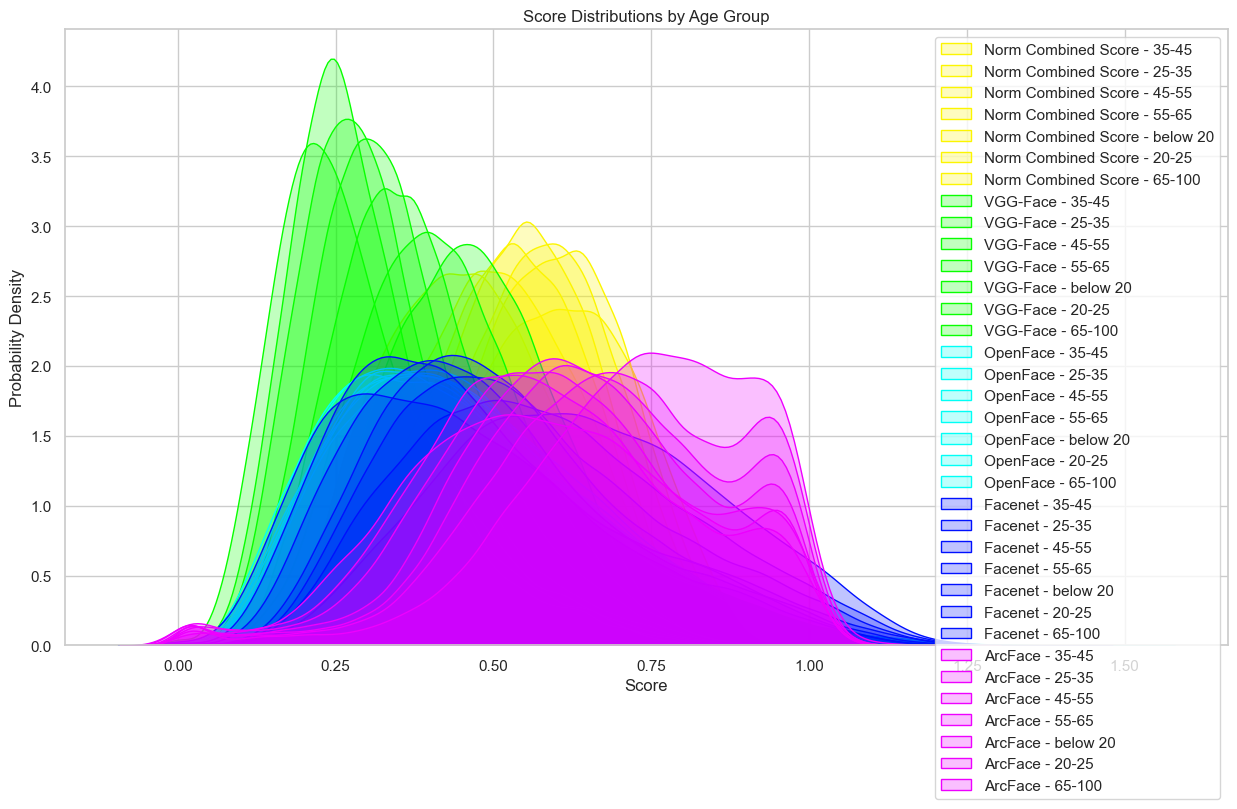

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame loading (replace this with your actual DataFrame loading method)
# df = pd.read_csv('your_dataset.csv')

# Set the style of the visualization
sns.set(style="whitegrid")

# Score columns to plot
score_columns = ['Norm Combined Score', 'VGG-Face', 'OpenFace', 'Facenet', 'ArcFace']

# Initialize the figure
plt.figure(figsize=(15, 8))

# Create a color palette
palette = sns.color_palette("hsv", len(score_columns))

# Plot each score distribution for each age group
for i, col in enumerate(score_columns):
    for age_group in df['Age Group'].unique():
        sns.kdeplot(df[df['Age Group'] == age_group][col], label=f'{col} - {age_group}', color=palette[i], shade=True)

plt.title('Score Distributions by Age Group')
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame loading (replace this with your actual DataFrame loading method)
# df = pd.read_csv('your_dataset.csv')
plt.rcParams.update({'font.size': 24})

# Set the style of the visualization
sns.set(style="whitegrid")

# Score columns to plot
score_columns = ['Norm Combined Score', 'VGG-Face', 'OpenFace', 'Facenet', 'ArcFace']

# Get unique age groups
age_groups = df['Age Group'].unique()

# Create a color palette
palette = sns.color_palette("hsv", len(score_columns))

# Iterate over each age group and create a separate plot
for age_group in age_groups:
    plt.figure(figsize=(12, 6))
    for col in score_columns:
        sns.kdeplot(df[df['Age Group'] == age_group][col], label=col, color=palette[score_columns.index(col)], shade=True)
    plt.title(f'Score Distributions for Age Group: {age_group}', fontsize=24)
    plt.xlabel('Score', fontsize=24)
    plt.ylabel('Probability Density', fontsize=24)
    plt.legend(fontsize=24)
    plt.tight_layout()

    # Save each plot as a JPEG file
    plt.savefig(f'../plots/results/age_group_{age_group}_distribution.jpeg')

    # Close the plot to prevent it from displaying in the notebook
    plt.close()


C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\3010862618.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Age Group'] == age_group][col], label=col, color=palette[score_columns.index(col)], shade=True)
C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\3010862618.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Age Group'] == age_group][col], label=col, color=palette[score_columns.index(col)], shade=True)
C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\3010862618.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Age Group'] == age_group][col], label=col, color=palette[score_colu

C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\2427608753.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered[col], label=f'{col}', color=palette[i], shade=True)
C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\2427608753.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered[col], label=f'{col}', color=palette[i], shade=True)
C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\2427608753.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered[col], label=f'{col}', color=palette[i], shade=True)
C:\Users\VIDEOKYC\AppData\Local\Temp\ipykernel_6876\2427608753.py:25: FutureWarning: 

`

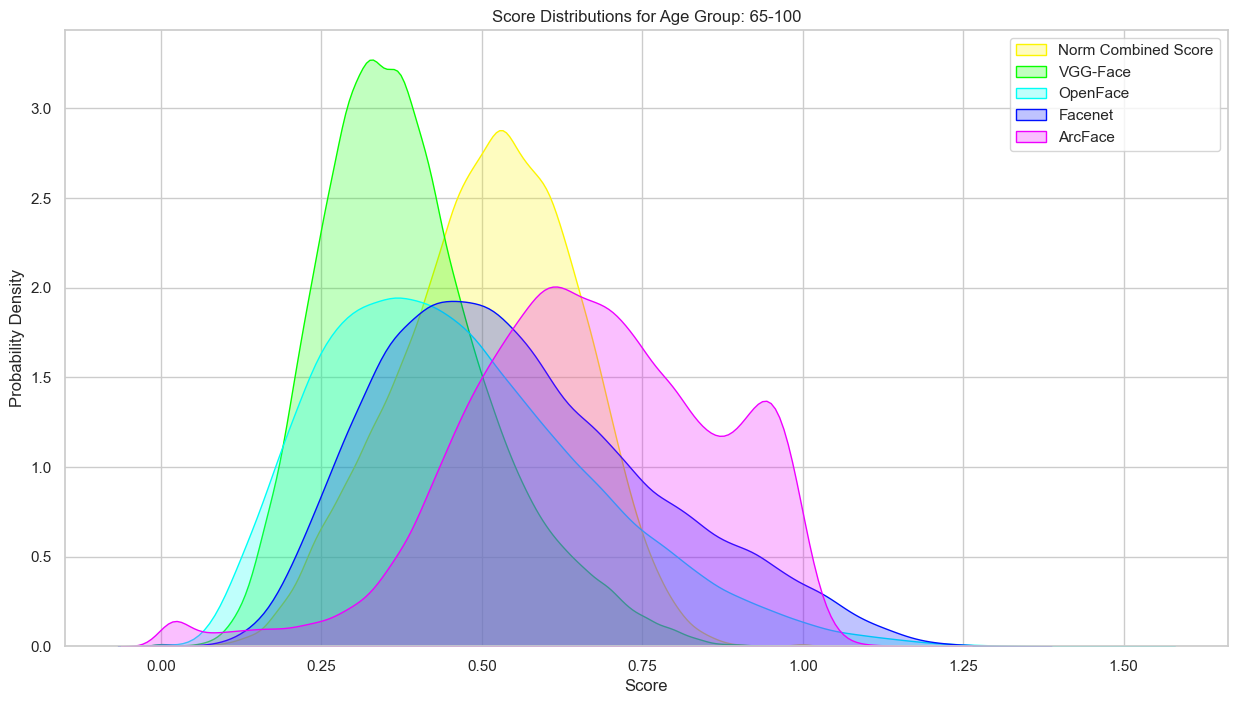

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame loading (replace this with your actual DataFrame loading method)
# df = pd.read_csv('your_dataset.csv')
plt.rcParams.update({'font.size': 24})

# Set the style of the visualization
sns.set(style="whitegrid")

# Score columns to plot
score_columns = ['Norm Combined Score', 'VGG-Face', 'OpenFace', 'Facenet', 'ArcFace']

# Filter the DataFrame for the '65-100' age group
df_filtered = df[df['Age Group'] == '25-35']

# Initialize the figure
plt.figure(figsize=(15, 8))

# Create a color palette
palette = sns.color_palette("hsv", len(score_columns))

# Plot each score distribution for the '65-100' age group
for i, col in enumerate(score_columns):
    sns.kdeplot(df_filtered[col], label=f'{col}', color=palette[i], shade=True)

plt.title('Score Distributions for Age Group: 65-100')
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()
